In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("2023_finalized_data.csv") 

positions = ["QB", "TE", "RB", "WR"]
df_filtered = df[df["Position"].isin(positions)].copy()

vif_columns = [
    "Age", "Games Played", "Games Started", "Passing Attempts", "Passing Completions",
    "Passing Yards", "Passing Touchdowns", "Interceptions Thrown", "Rushing Attempts",
    "Rushing Yards", "Rushing Touchdowns", "Targets", "Receptions", "Receiving Yards",
    "Receiving Touchdowns", "Fumbles" , "XP2", "ESPN ADP", "Sleeper ADP", "NFL ADP",
    "RTSports ADP", "Average ADP", "Positional ADP"
]

df_filtered[vif_columns] = df_filtered[vif_columns].fillna(0)

X = df_filtered[vif_columns]
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Feature         VIF
0                  const  118.158864
1                    Age    1.164473
2           Games Played    1.710114
3          Games Started    4.444757
4       Passing Attempts  693.470012
5    Passing Completions  877.975667
6          Passing Yards  191.559927
7     Passing Touchdowns   38.655529
8   Interceptions Thrown    9.729685
9       Rushing Attempts   34.082915
10         Rushing Yards   36.977921
11    Rushing Touchdowns    3.826369
12               Targets   58.813722
13            Receptions   50.267012
14       Receiving Yards   23.810233
15  Receiving Touchdowns    3.760335
16               Fumbles    3.095820
17                   XP2    1.132329
18              ESPN ADP   27.618346
19           Sleeper ADP   48.266947
20               NFL ADP   19.911253
21          RTSports ADP   33.471765
22           Average ADP   30.868395
23        Positional ADP    2.052287


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("2023_finalized_data.csv")  
positions = ["QB", "TE", "RB", "WR"]
df_filtered = df[df["Position"].isin(positions)].copy()

vif_columns = [
    "Age", "Games Played", "Games Started",
    "Passing Yards", "Passing Touchdowns", "Interceptions Thrown", "Rushing Attempts",
    "Rushing Yards", "Rushing Touchdowns", "Receptions", "Receiving Yards",
    "Receiving Touchdowns", "Fumbles" , "XP2", "ESPN ADP", "Sleeper ADP", "NFL ADP",
    "RTSports ADP", "Average ADP", "Positional ADP"
]

df_filtered[vif_columns] = df_filtered[vif_columns].fillna(0)

X = df_filtered[vif_columns]
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Feature         VIF
0                  const  116.217424
1                    Age    1.163832
2           Games Played    1.684614
3          Games Started    4.174485
4          Passing Yards   51.897417
5     Passing Touchdowns   29.066058
6   Interceptions Thrown    8.642348
7       Rushing Attempts   33.397919
8          Rushing Yards   36.592289
9     Rushing Touchdowns    3.784687
10            Receptions   18.933655
11       Receiving Yards   21.861152
12  Receiving Touchdowns    3.759528
13               Fumbles    3.046487
14                   XP2    1.120258
15              ESPN ADP   27.595063
16           Sleeper ADP   48.072713
17               NFL ADP   19.777701
18          RTSports ADP   33.163909
19           Average ADP   30.866980
20        Positional ADP    2.038089


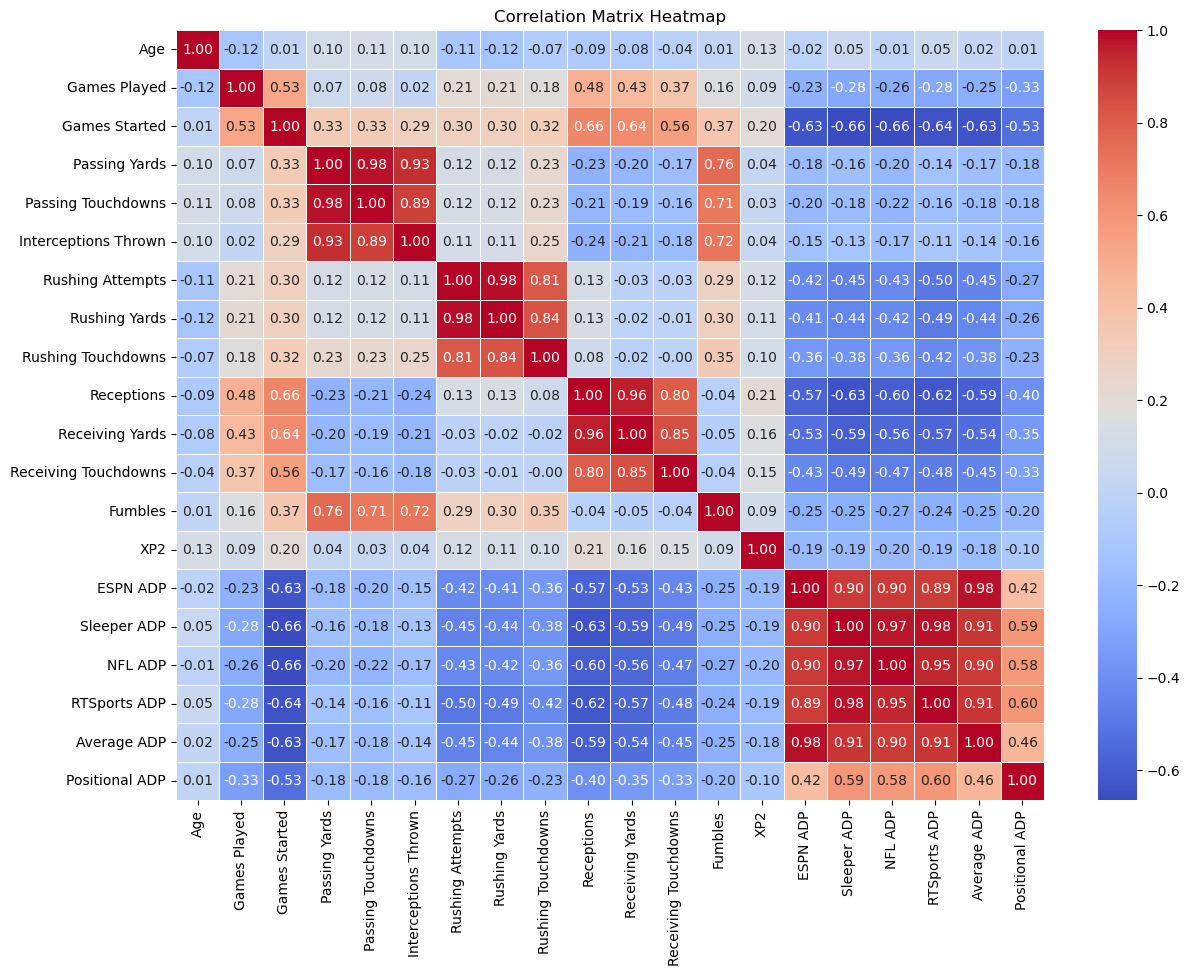

In [ ]:
correlation_matrix = df_filtered[vif_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_kickers = df[df["Position"] == "K"].copy()

vif_columns_kickers = [
    "Age", "Games Played", "Games Started", "Field Goals Attempted 0-39",
    "Field Goals Made 0-39", "Field Goals Attempted 40-49", "Field Goals Made 40-49",
    "Field Goals Attempted 50+", "Field Goals Made 50+", "Field Goals Attempted",
    "Field Goals Made", "Extra Points Attempted", "Extra Points Made",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP"
]

df_kickers[vif_columns_kickers] = df_kickers[vif_columns_kickers].fillna(0)

X_kickers = df_kickers[vif_columns_kickers]
X_kickers = sm.add_constant(X_kickers)  

vif_data_kickers = pd.DataFrame()
vif_data_kickers["Feature"] = X_kickers.columns
vif_data_kickers["VIF"] = [variance_inflation_factor(X_kickers.values, i) for i in range(X_kickers.shape[1])]

print(vif_data_kickers)


                        Feature         VIF
0                         const  392.438006
1                           Age    1.699688
2                  Games Played    1.740509
3                 Games Started         NaN
4    Field Goals Attempted 0-39         inf
5         Field Goals Made 0-39         inf
6   Field Goals Attempted 40-49         inf
7        Field Goals Made 40-49         inf
8     Field Goals Attempted 50+         inf
9          Field Goals Made 50+         inf
10        Field Goals Attempted         inf
11             Field Goals Made         inf
12       Extra Points Attempted  872.958950
13            Extra Points Made  936.413885
14                     ESPN ADP   16.970323
15                  Sleeper ADP    9.324737
16                      NFL ADP   13.843743
17                 RTSports ADP   15.937939
18                  Average ADP   27.991736
19               Positional ADP    6.873067


/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_kickers = df[df["Position"] == "K"].copy()

vif_columns_kickers = [
    "Age", "Games Played",
    "Field Goals Made 0-39", "Field Goals Made 40-49", "Field Goals Made 50+", "Field Goals Attempted", "Extra Points Made",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP"
]

df_kickers[vif_columns_kickers] = df_kickers[vif_columns_kickers].fillna(0)

X_kickers = df_kickers[vif_columns_kickers]
X_kickers = sm.add_constant(X_kickers)  

vif_data_kickers = pd.DataFrame()
vif_data_kickers["Feature"] = X_kickers.columns
vif_data_kickers["VIF"] = [variance_inflation_factor(X_kickers.values, i) for i in range(X_kickers.shape[1])]

print(vif_data_kickers)


                   Feature         VIF
0                    const  316.194633
1                      Age    1.693962
2             Games Played    1.631769
3    Field Goals Made 0-39   41.016428
4   Field Goals Made 40-49   18.598787
5     Field Goals Made 50+    6.346130
6    Field Goals Attempted  121.022964
7        Extra Points Made   12.961988
8                 ESPN ADP   13.473692
9              Sleeper ADP    8.233903
10                 NFL ADP   12.564698
11            RTSports ADP   13.874591
12             Average ADP   25.845079
13          Positional ADP    6.608359


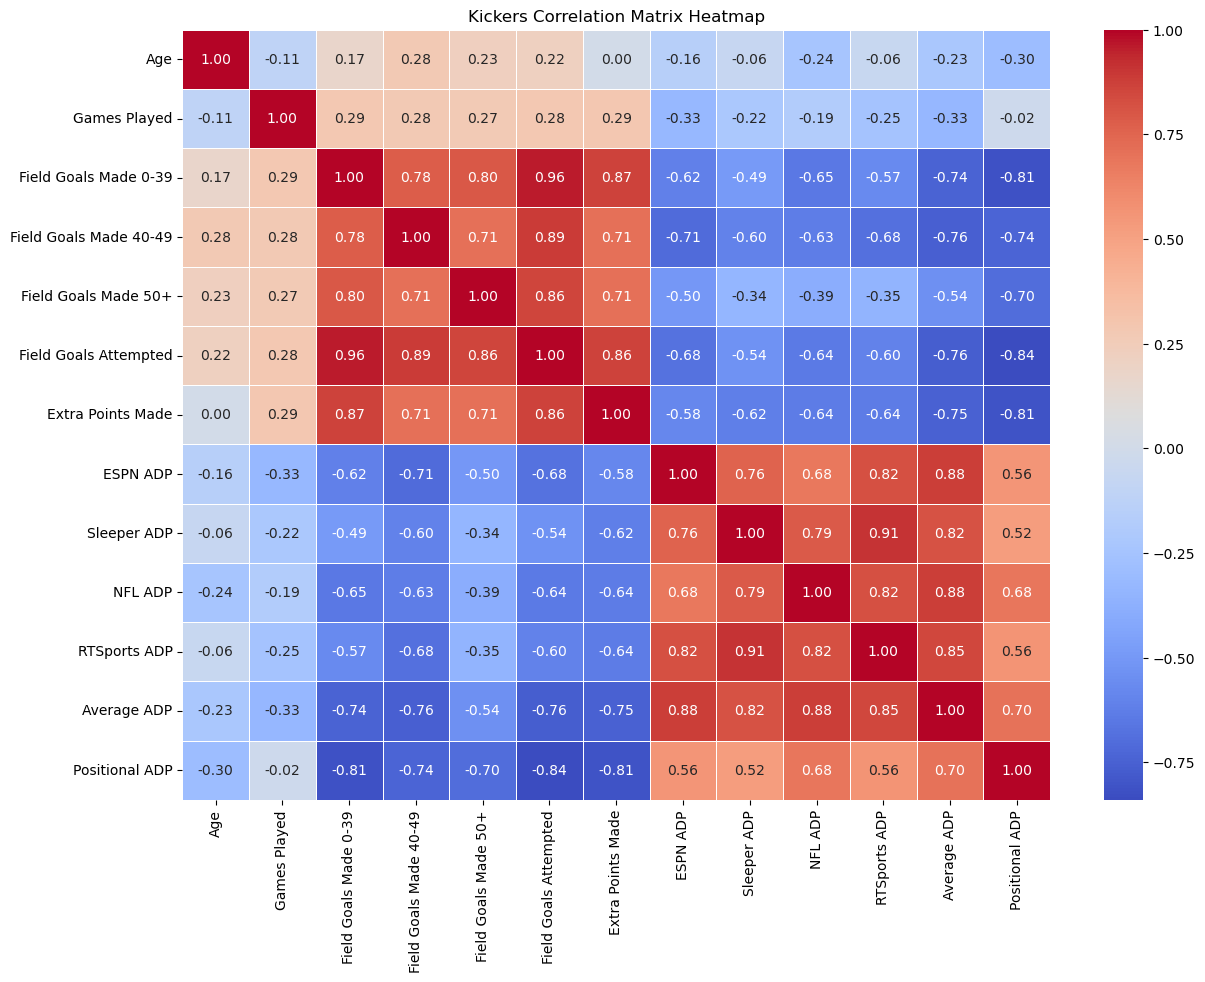

In [ ]:
correlation_matrix_kickers = df_kickers[vif_columns_kickers].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_kickers, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Kickers Correlation Matrix Heatmap")
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_defense = df[df["Position"] == "DEF"].copy()

vif_columns_defense = [
    "Total Yards Allowed", "Total Plays", "Takeaways", "First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", "Penalties Committed", "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", "Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", "Fantasy Points From Points",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP"
]

df_defense[vif_columns_defense] = df_defense[vif_columns_defense].fillna(0)

X_defense = df_defense[vif_columns_defense]
X_defense = sm.add_constant(X_defense)  

vif_data_defense = pd.DataFrame()
vif_data_defense["Feature"] = X_defense.columns
vif_data_defense["VIF"] = [variance_inflation_factor(X_defense.values, i) for i in range(X_defense.shape[1])]

print(vif_data_defense)


                        Feature          VIF
0                         const  4728.525254
1           Total Yards Allowed          inf
2                   Total Plays    15.135788
3                     Takeaways  1979.228364
4           First Downs Allowed    79.725511
5         Passing Yards Allowed          inf
6    Passing Touchdowns Allowed    25.709013
7         Rushing Yards Allowed          inf
8    Rushing Touchdowns Allowed    25.165151
9           Penalties Committed    22.435890
10                Penalty Yards    22.513685
11       First Downs by Penalty     6.391805
12     Percent Drives Scored On    27.899152
13      Percent Drives Takeaway    70.615438
14                     ST_Sacks     7.093805
15             ST_Interceptions  1266.651995
16         ST_Fumble Recoveries   456.276293
17            ST_Forced Fumbles     7.374758
18                  ST_Safeties     9.268078
19  ST_Special Teams Touchdowns     3.187678
20   Fantasy Points From Points    48.128315
21        

/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns



df_defense = df[df["Position"] == "DEF"].copy()

vif_columns_defense = [
    "Total Plays", "First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", "Penalties Committed", "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", "Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", "Fantasy Points From Points",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP"
]

df_defense[vif_columns_defense] = df_defense[vif_columns_defense].fillna(0)

X_defense = df_defense[vif_columns_defense]
X_defense = sm.add_constant(X_defense)  

vif_data_defense = pd.DataFrame()
vif_data_defense["Feature"] = X_defense.columns
vif_data_defense["VIF"] = [variance_inflation_factor(X_defense.values, i) for i in range(X_defense.shape[1])]

print(vif_data_defense)


                        Feature          VIF
0                         const  4210.349883
1                   Total Plays     9.290809
2           First Downs Allowed    58.815415
3         Passing Yards Allowed    20.859420
4    Passing Touchdowns Allowed    25.252477
5         Rushing Yards Allowed     8.902833
6    Rushing Touchdowns Allowed    25.136795
7           Penalties Committed    12.513841
8                 Penalty Yards    13.109130
9        First Downs by Penalty     5.557156
10     Percent Drives Scored On    23.019567
11      Percent Drives Takeaway    70.245127
12                     ST_Sacks     5.539281
13             ST_Interceptions    50.723241
14         ST_Fumble Recoveries     9.982202
15            ST_Forced Fumbles     6.812532
16                  ST_Safeties     4.272808
17  ST_Special Teams Touchdowns     3.063524
18   Fantasy Points From Points    47.581420
19                     ESPN ADP    17.034831
20                  Sleeper ADP    40.184019
21        

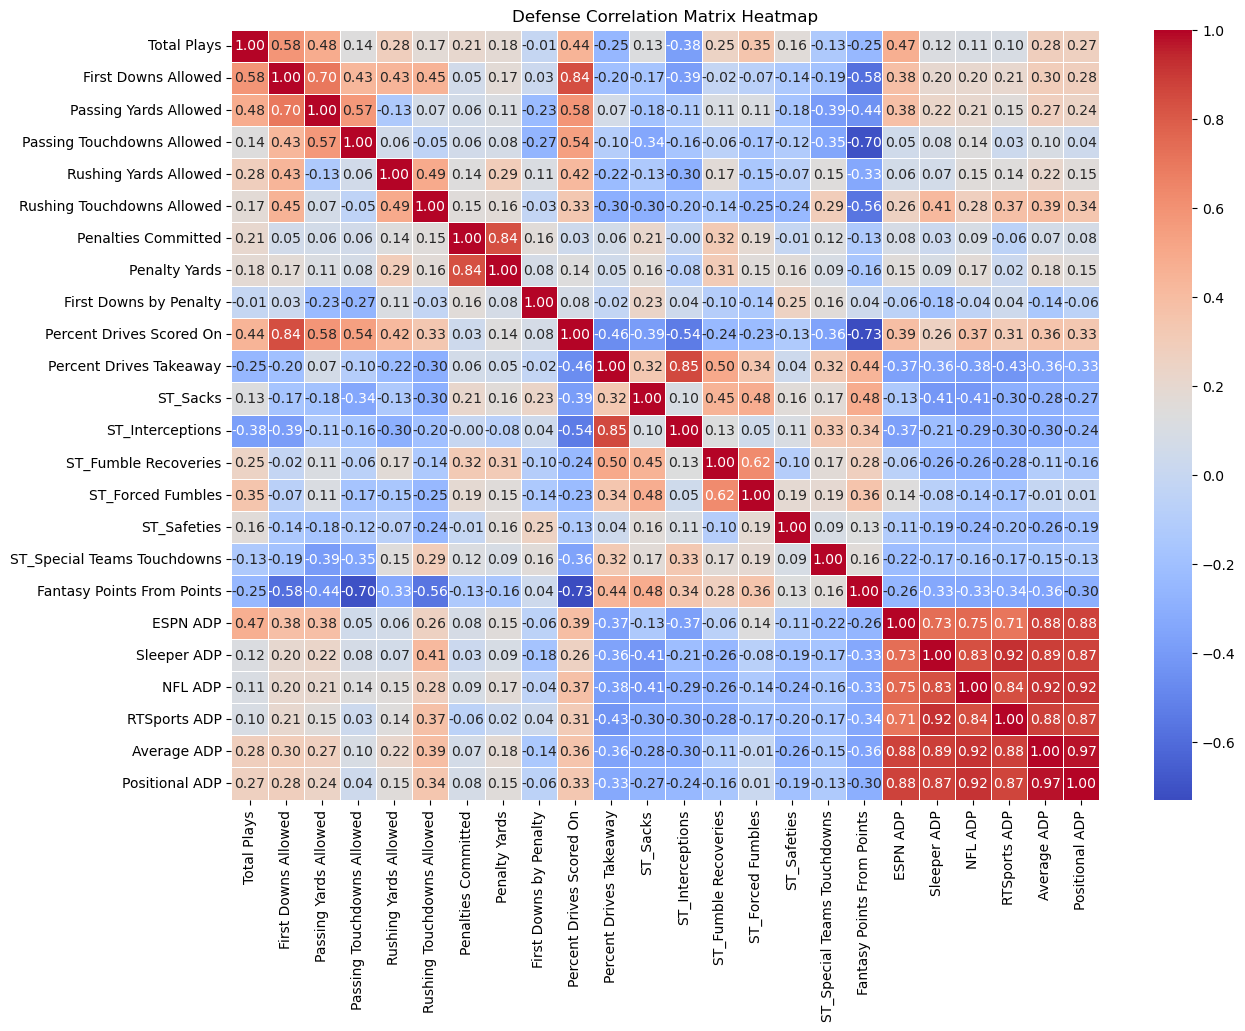

In [ ]:
correlation_matrix_defense = df_defense[vif_columns_defense].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_defense, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Defense Correlation Matrix Heatmap")
plt.show()
